#Definitions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

legs = 8
#m12
b_acc = 55.3333
b_stdev = 23.5106

b_acc = 58.0000
b_stdev = 20.1243

def conf(stdev, level=0.999, trials=100):
    if level==0.95:
        z = 1.960
    elif level==0.99:
        z=2.576
    elif level==0.999:
        z=3.291
    return z*stdev/math.sqrt(trials)

confs = np.vectorize(conf)

def plot(x,y,title,acc,stdev,b_acc=b_acc,b_stdev=b_stdev):
    ax[x,y].title.set_text(title)
    if acc!=0:
        ax[x,y].bar(["noise",title[:2]], [b_acc,acc], yerr=[conf(b_stdev), conf(stdev)], 
                    capsize=legs, color=["slategray","crimson"])

def batch_plot(labels, accs, stdevs, b_acc,b_stdev):
    for row in range(np.shape(labels)[0]):
        for column in range(np.shape(labels)[1]):
            plot(row,column,labels[row,column],accs[row,column],stdevs[row,column])

def get_acc(path, all=True, clean=False, init=False):
    num, den = 0,0
    with open(path) as csvfile:
        reader = csv.reader(csvfile, delimiter = ",")
        for row in reader:
            if (all or (clean and not init and row[4]=="clean") or (not clean and init and row[1]=="INIT") or (clean and init and row[4]=="clean" and row[1]=="INIT")): den+=1
            if (all or (clean and not init and row[4]=="clean") or (not clean and init and row[1]=="INIT") or (clean and init and row[4]=="clean" and row[1]=="INIT")) and row[3]=="correct": num+=1
    return num/den

get_accs = np.vectorize(get_acc)

# Graphs

## m12ci

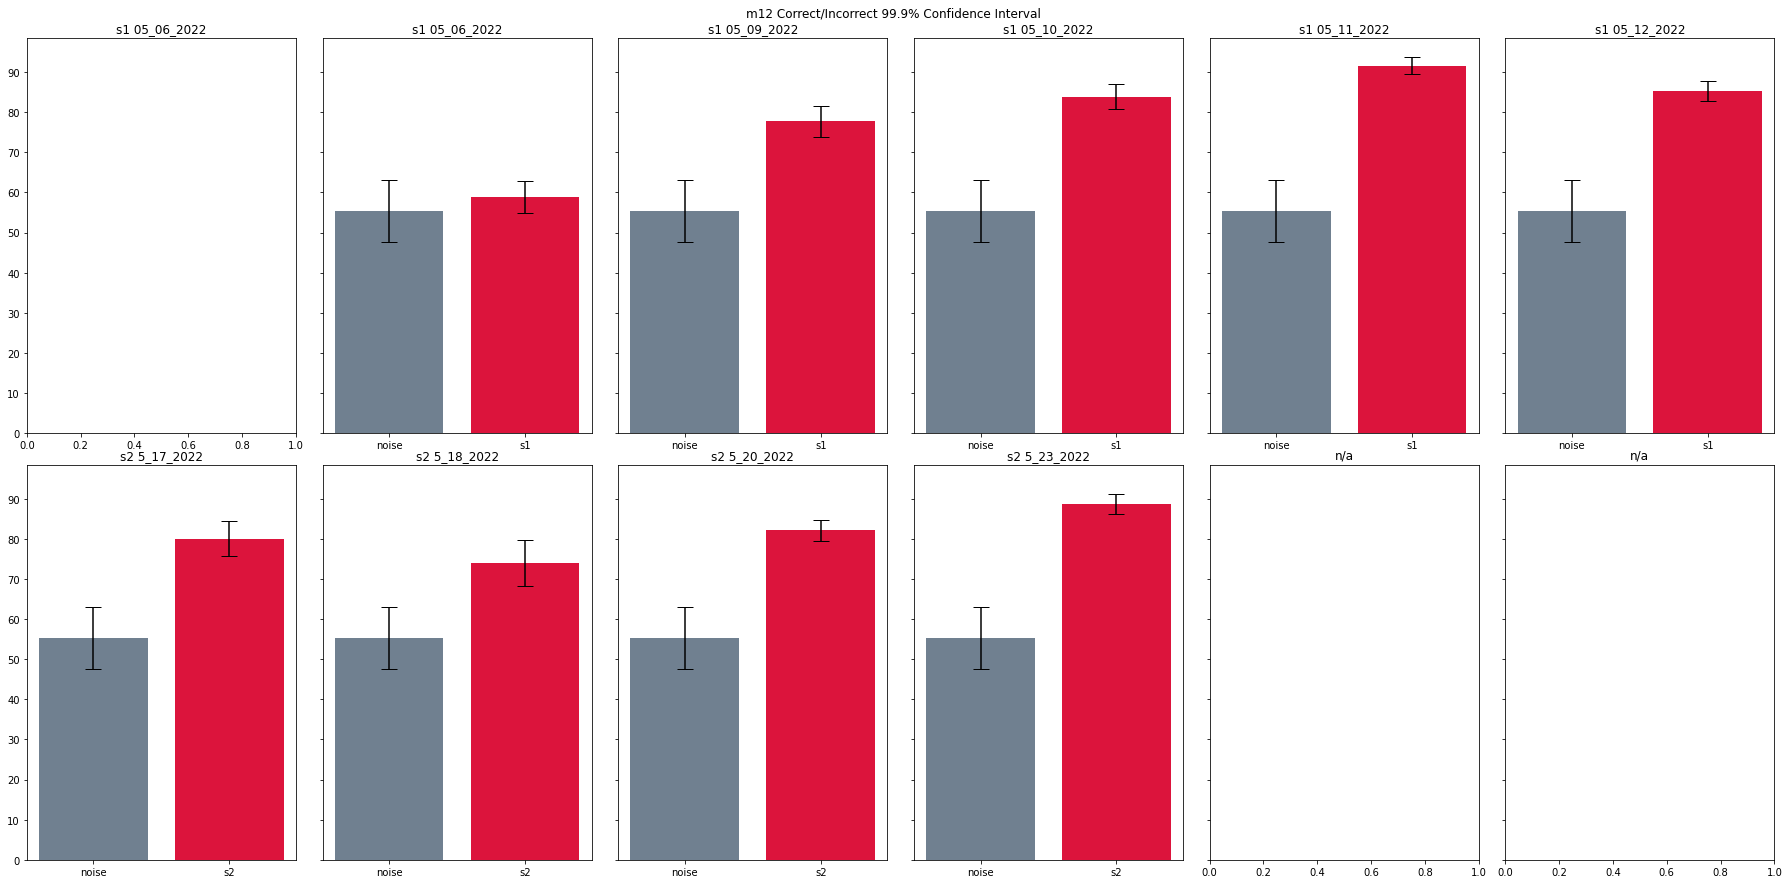

In [ ]:
#m12ci
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(25,12), sharey=True)
fig.suptitle("m12 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s1 05_06_2022",0,0)
plot(0,1,"s1 05_06_2022",58.8889,11.8399)
plot(0,2,"s1 05_09_2022",77.7059,11.6471)
plot(0,3,"s1 05_10_2022",83.9091,9.4339)
plot(0,4,"s1 05_11_2022",91.6250,6.3567)
plot(0,5,"s1 05_12_2022",85.3636,7.5825)

plot(1,0, "s2 5_17_2022",80.0769,13.1020)
plot(1,1, "s2 5_18_2022",74.0000,17.693)
plot(1,2, "s2 5_20_2022",82.0833,7.717)
plot(1,3, "s2 5_23_2022",88.6667,7.2953)
plot(1,4, "n/a",0,0)
plot(1,5, "n/a",0,0)

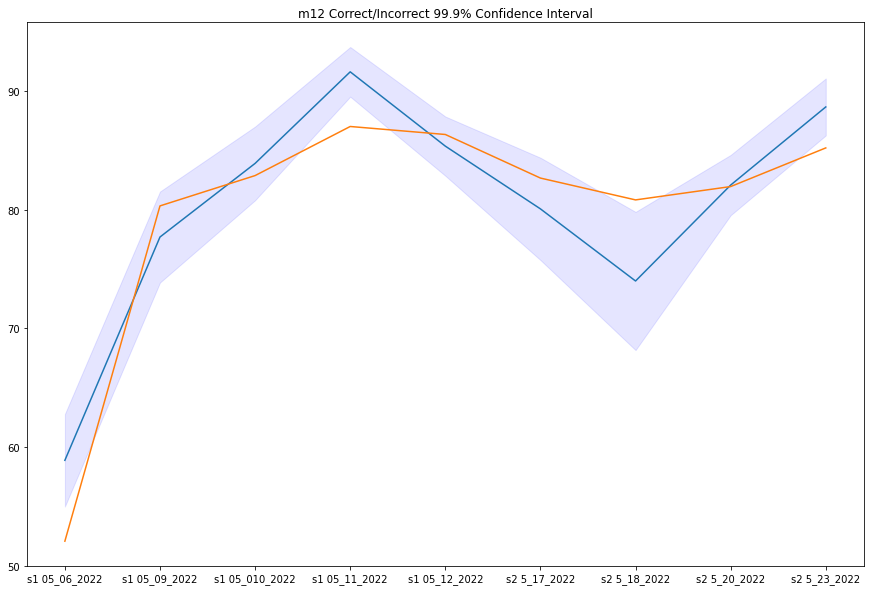

In [ ]:
trials = ["s1 05_06_2022","s1 05_09_2022","s1 05_010_2022",
          "s1 05_11_2022","s1 05_12_2022","s2 5_17_2022","s2 5_18_2022",
          "s2 5_20_2022","s2 5_23_2022"]
accs = [58.8889,77.7059,83.9091,91.6250,85.3636,80.0769,74.0000,82.0833,88.6667]
stdevs = [11.8399,11.6471,9.4339,6.3567,7.5825,13.1020,17.693,7.717,7.2953]
errs = confs(stdevs)

fig,ax = plt.subplots(figsize=(15,10))
ax.set_title("m12 Correct/Incorrect 99.9% Confidence Interval")


a1 = [52.075471698113205,80.32786885245902,82.88288288288288,87.01923076923077,
      86.34538152610442,82.67326732673267,80.83333333333333,81.9571865443425,
      85.21400778210116]
a2 = [97.61904761904762,97.67441860465115,91.52542372881356,87.61904761904762,
      79.03225806451613,0,0,0,0]
a3 = [10.79136690647482,60.86956521739131,73.07692307692307,86.40776699029125,
      93.60000000000001,0,0,0,0]
a4 = [0,0,0,0,0,77.56410256410257,78.37837837837837,76.88888888888889,80.55555555555556]
a5 = [0,0,0,0,0,97.87234042553192,87.5,92.23300970873787,93.67088607594937]

ax.plot(trials,accs)
ax.fill_between(trials, (accs-errs), (accs+errs), color="b", alpha=.1)
ax.plot(trials,np.array(a1))

#ax.plot(trials,a2)
#ax.plot(trials,a3)
#ax.plot(trials,a4)
#ax.plot(trials,a5)
#plt.figure(figsize=(15,10))
#plt.errorbar(trials, accs, yerr=errs,capsize=legs)

#ax.plot(trials,np.abs(accs-np.array(a1)))

## m12lr

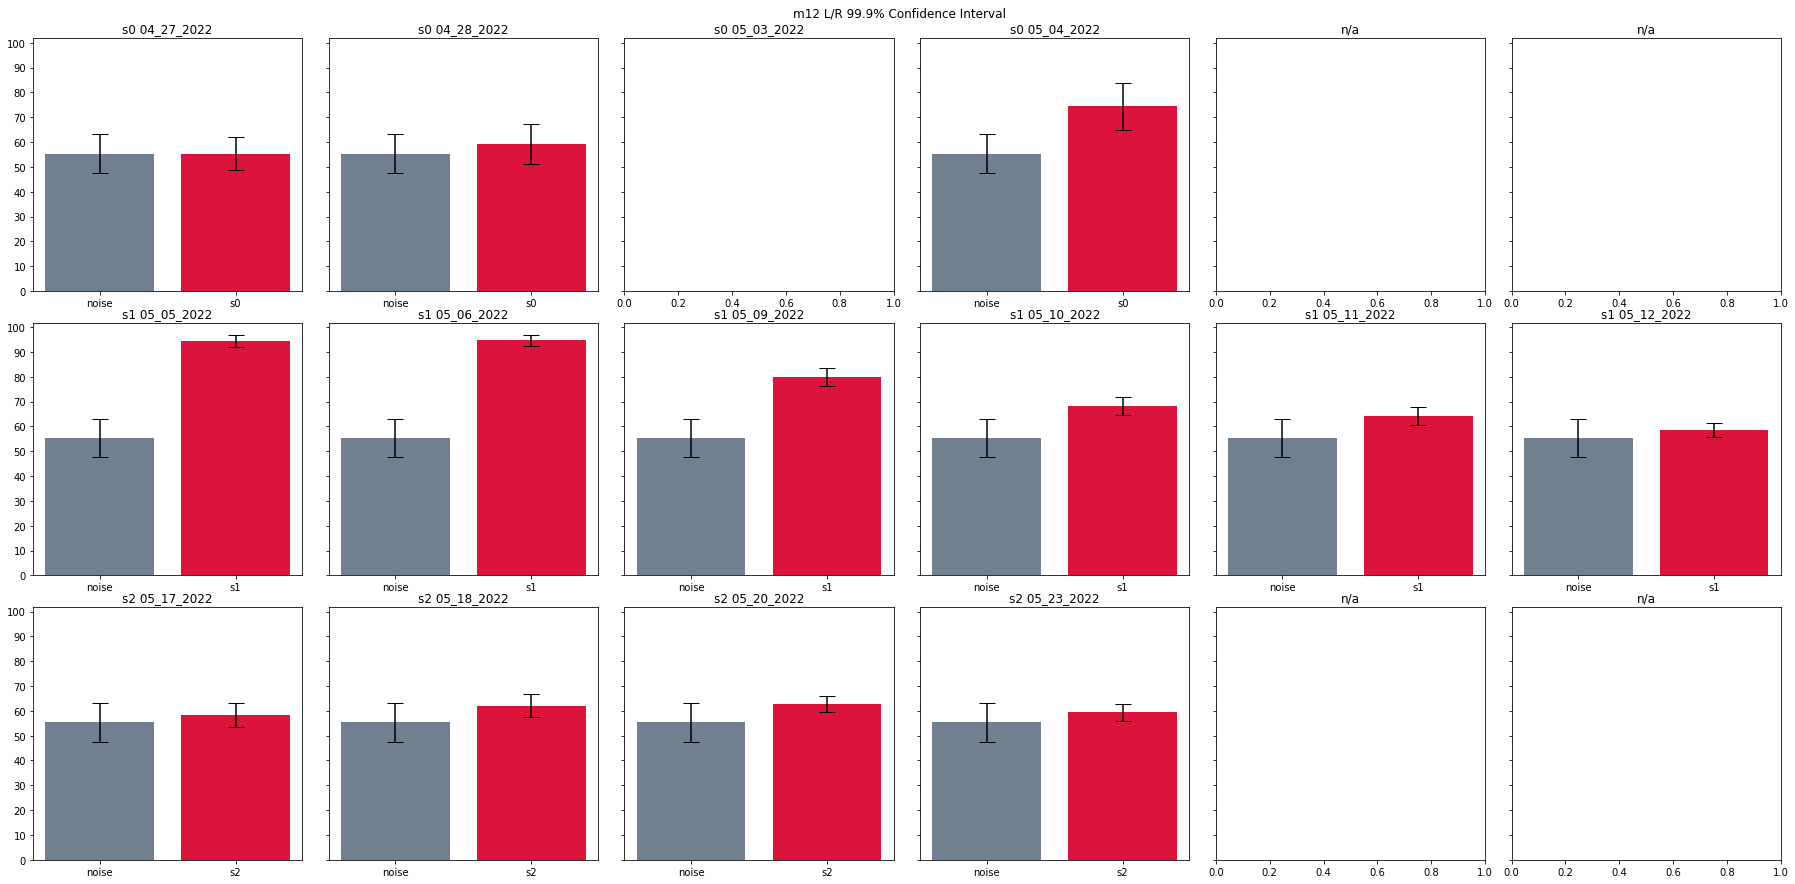

In [ ]:
#m12lr
fig, ax = plt.subplots(nrows=3, ncols=6, figsize=(25,12), sharey=True)
fig.suptitle("m12 L/R 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s0 04_27_2022",55.3333,19.8718)
plot(0,1,"s0 04_28_2022",59.2500,24.8634)
plot(0,2,"s0 05_03_2022",0,0)
plot(0,3,"s0 05_04_2022",74.3333,29.2024)
plot(0,4,"n/a",0,0)
plot(0,5,"n/a",0,0)

plot(1,0,"s1 05_05_2022",94.4146,7.5451)
plot(1,1,"s1 05_06_2022",94.7222,6.5603)
plot(1,2,"s1 05_09_2022",79.8235,11.2382)
plot(1,3,"s1 05_10_2022",68.2727,10.7460)
plot(1,4,"s1 05_11_2022",64.2083,10.9437)
plot(1,5,"s1 05_12_2022",58.3939,8.6148)

plot(2,0,"s2 05_17_2022",58.3077,14.534)
plot(2,1,"s2 05_18_2022",62.0000,14.1956)
plot(2,2,"s2 05_20_2022",62.7692,10.3235)
plot(2,3,"s2 05_23_2022",59.3913,10.3507)
plot(2,4,"n/a",0,0)
plot(2,5,"n/a",0,0)

<ErrorbarContainer object of 3 artists>

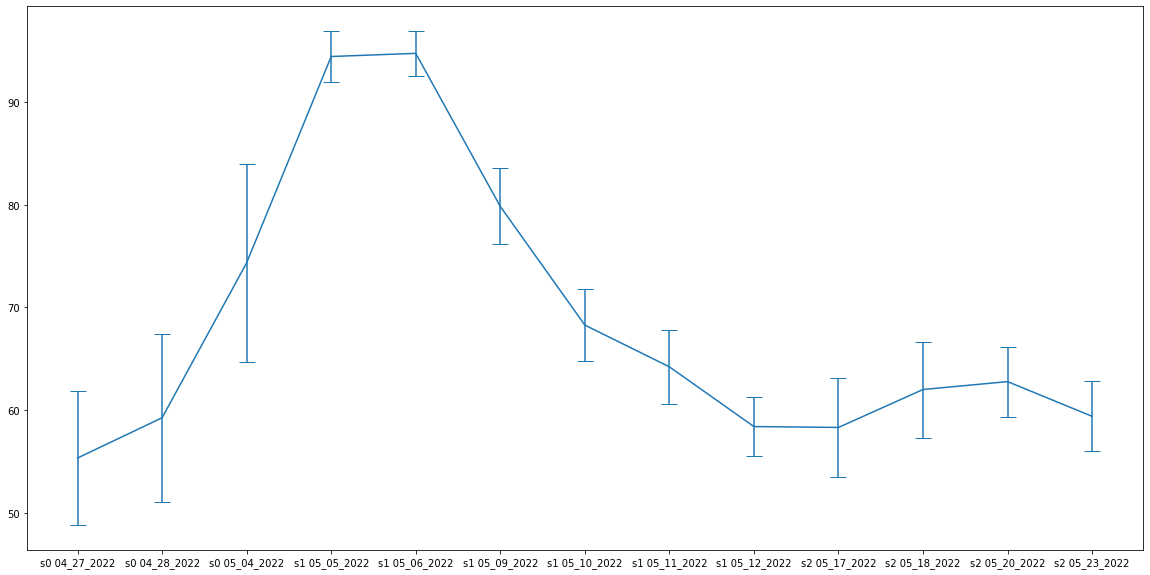

In [ ]:
trials = ["s0 04_27_2022","s0 04_28_2022","s0 05_04_2022","s1 05_05_2022",
          "s1 05_06_2022","s1 05_09_2022","s1 05_10_2022","s1 05_11_2022",
          "s1 05_12_2022","s2 05_17_2022","s2 05_18_2022","s2 05_20_2022",
          "s2 05_23_2022"]
accs = [55.3333,59.2500,74.3333,94.4146,94.7222,79.8235,68.2727,64.2083,
        58.3939,58.3077,62.0000,62.7692,59.3913]
stdevs = [19.8718,24.8634,29.2024,7.5451,6.5603,11.2382,10.7460,10.9437,
          8.6148,14.534,14.1956,10.3235,10.3507]

plt.figure(figsize=(20,10))
plt.errorbar(trials, accs, yerr=confs(stdevs),capsize=legs)

## m12lr rbf

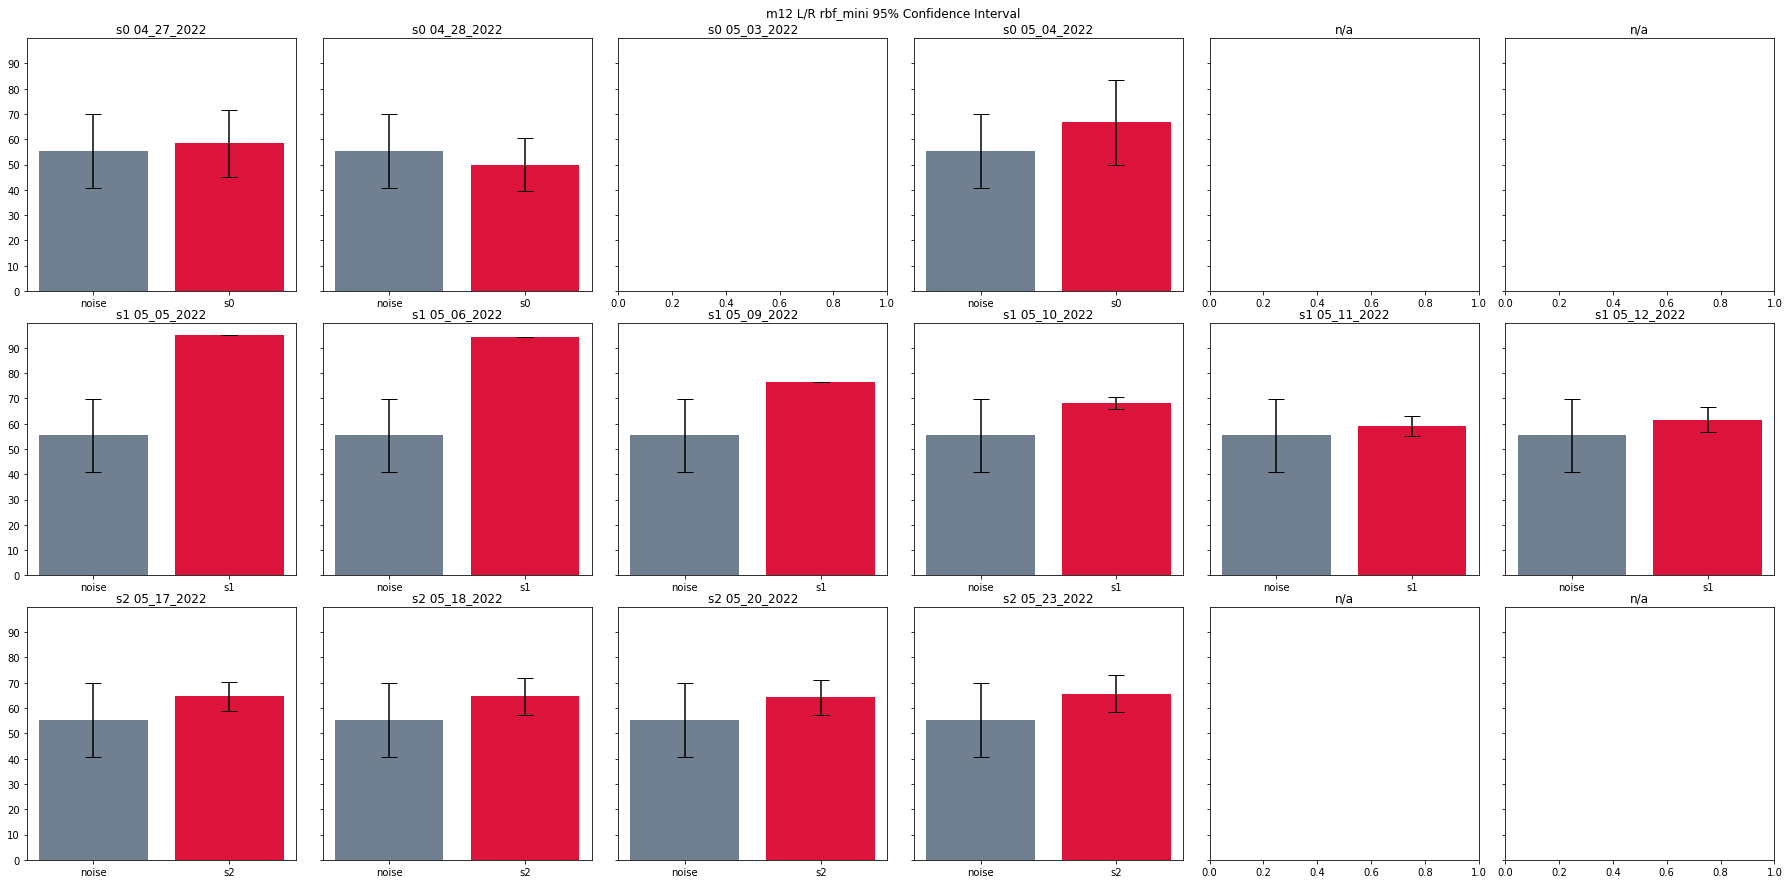

In [ ]:
#m12lr
fig, ax = plt.subplots(nrows=2, ncols=9, figsize=(25,12), sharey=True)
fig.suptitle("m15 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s0 04_27_2022",58.3333,21.3437)
plot(0,1,"s0 04_28_2022",50.0000,16.7705)
plot(0,2,"s0 05_03_2022",0,0)
plot(0,3,"s0 05_04_2022",66.6667,26.8742)
plot(0,4,"n/a",0,0)
plot(0,5,"n/a",0,0)

plot(1,0,"s1 05_05_2022",95.1220,0)
plot(1,1,"s1 05_06_2022",94.4444,0)
plot(1,2,"s1 05_09_2022",76.4706,0)
plot(1,3,"s1 05_10_2022",68.1818,4.0909)
plot(1,4,"s1 05_11_2022",59.1667,6.4684)
plot(1,5,"s1 05_12_2022",61.5152,7.9021)

## m15ci

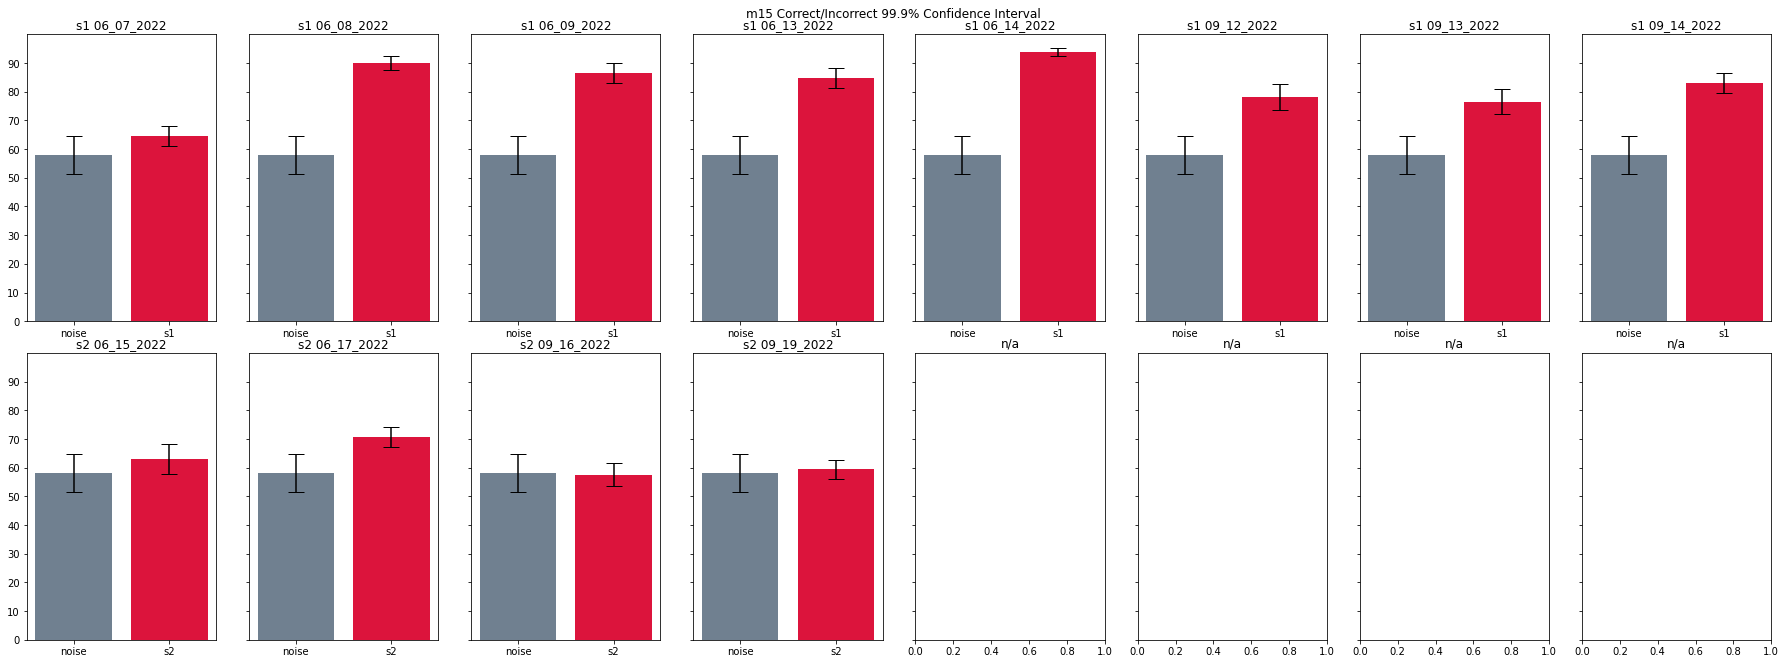

In [ ]:
#m15ci
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25,9), sharey=True)
fig.suptitle("m15 Correct/Incorrect 99.9% Confidence Interval",y=1.02)
plt.tight_layout()
plt.yticks(np.arange(0,110,10))

plot(0,0,"s1 06_07_2022",64.5556,10.1243)
plot(0,1,"s1 06_08_2022",89.8929,7.4247)
plot(0,2,"s1 06_09_2022",86.5000,10.9560)
plot(0,3,"s1 06_13_2022",84.8000,10.2294)
plot(0,4,"s1 06_14_2022",93.7500,4.4651)
plot(0,5,"s1 09_12_2022",78.1818,13.8740)
plot(0,6,"s1 09_13_2022",76.5714,12.8037)
plot(0,7,"s1 09_14_2022",83.0667,10.9747)

plot(1,0,"s2 06_15_2022",62.9000,15.9374)
plot(1,1,"s2 06_17_2022",70.6500,10.5682)
plot(1,2,"s2 09_16_2022",57.4762,12.1166)
plot(1,3,"s2 09_19_2022",59.4167,10.1057)
plot(1,4,"n/a",0,0)
plot(1,5,"n/a",0,0)
plot(1,6,"n/a",0,0)
plot(1,7,"n/a",0,0)

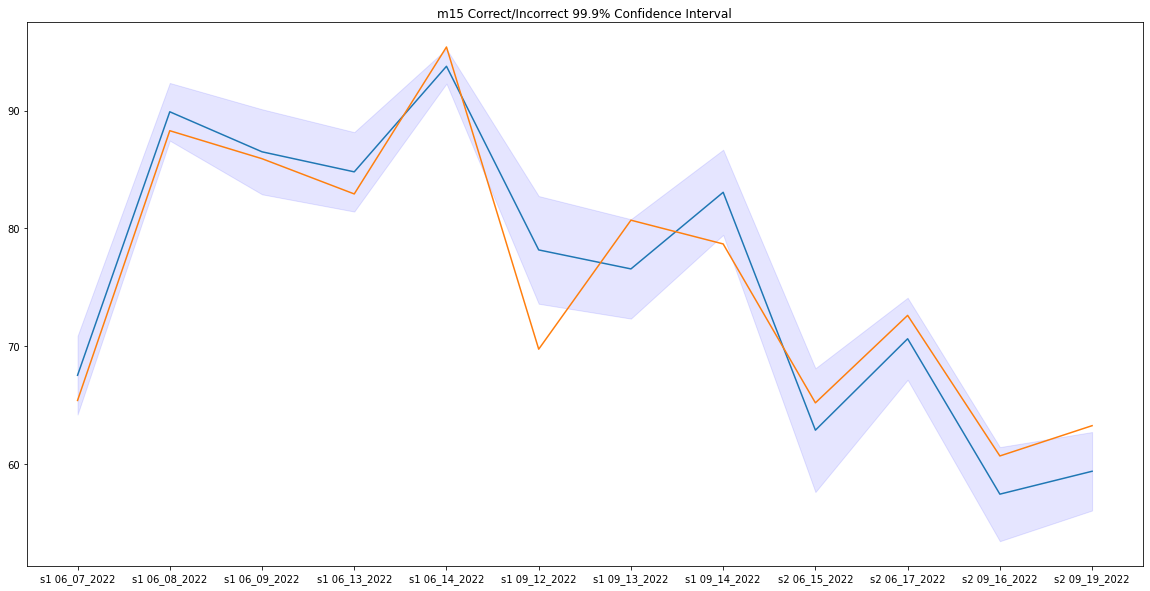

In [ ]:
trials = ["s1 06_07_2022","s1 06_08_2022","s1 06_09_2022","s1 06_13_2022","s1 06_14_2022",
          "s1 09_12_2022","s1 09_13_2022","s1 09_14_2022","s2 06_15_2022","s2 06_17_2022",
          "s2 09_16_2022","s2 09_19_2022"]
accs = [67.5556,89.8929,86.5000,84.8000,93.7500,78.1818,76.5714,83.0667,62.9000,70.6500,
        57.4762,59.4167]
stdevs = [10.1243,7.4247,10.9560,10.2294,4.4651,13.8740,12.8037,10.9747,15.9374,10.5682,
          12.1166,10.1057]
errs = confs(stdevs)
'''
plt.figure(figsize=(20,10))
plt.errorbar(trials, accs, yerr=confs(stdevs),capsize=legs)
'''
fig,ax = plt.subplots(figsize=(20,10))
ax.set_title("m15 Correct/Incorrect 99.9% Confidence Interval")


paths = ["/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/06_07_2022___09_56_19/trial_parameters_06_07_2022___09_56_19.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/06_08_2022___10_33_27/trial_parameters_06_08_2022___10_33_27.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/06_09_2022___10_46_33/trial_parameters_06_09_2022___10_46_33.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/06_13_2022___12_16_24/trial_parameters_06_13_2022___12_16_24.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/06_14_2022___11_32_27/trial_parameters_06_14_2022___11_32_27.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/09_12_2022___11_59_23/trial_parameters_09_12_2022___11_59_23.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/09_13_2022___15_07_02/trial_parameters_09_13_2022___15_07_02.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s1/09_14_2022___13_49_35/trial_parameters_09_14_2022___13_49_35.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s2/06_15_2022___12_52_13/trial_parameters_06_15_2022___12_52_13.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s2/06_17_2022___12_11_05/trial_parameters_06_17_2022___12_11_05.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s2/09_16_2022___13_58_41/trial_parameters_09_16_2022___13_58_41.csv",
         "/content/drive/MyDrive/CalciumImaging_Lur のコピー/mice_datasets/m15n/s2/09_19_2022___11_33_25/trial_parameters_09_19_2022___11_33_25.csv"]



test = [66.66666666666666,77.74193548387098,75.08196721311475,87.10801393728222,91.28787878787878,
        67.5392670157068,79.63800904977376,79.62085308056872,
        67.98245614035088,76.55677655677655,66.83937823834198,62.43654822335025]

ax.plot(trials, accs)
#ax.plot(trials, test)
#ax.plot(trials, 100*get_accs(paths))
#ax.plot(trials, np.hstack(100*get_accs(paths,all=False,clean=True)[:4] , 100*get_accs(paths,all=False,clean=True,init=True)[4:]) )
#ax.plot(trials, 100-100*get_accs(paths,all=False,clean=True))
ax.plot(trials, 100*get_accs(paths,all=False,clean=True))

ax.fill_between(trials, (accs-errs), (accs+errs), color="b", alpha=.1)

#ax.plot(trials, accs-100*get_accs(paths,all=False,clean=True))
#ax.plot(trials, np.abs(accs-100*get_accs(paths)))

<ErrorbarContainer object of 3 artists>

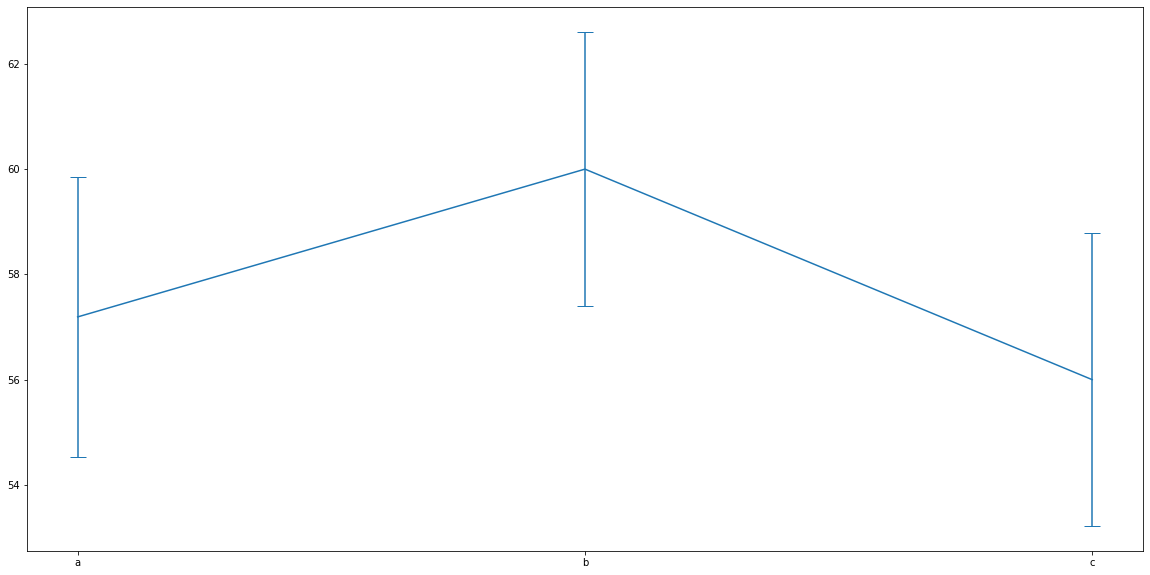

In [ ]:
trials = ["a","b","c"]
accs = [57.1923, 60, 56]
stdevs = [8.1058, 7.9215, 8.4528]

plt.figure(figsize=(20,10))
plt.errorbar(trials, accs, yerr=confs(stdevs),capsize=legs)